# 01.01 - PROYECTO KAGGLE

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 25% 5.00M/20.1M [00:00<00:00, 27.9MB/s]
100% 20.1M/20.1M [00:00<00:00, 88.2MB/s]


## unzip and inspect data

In [3]:
!unzip udea*.zip > /dev/null

In [4]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## Cargar `train.csv` con pandas



In [6]:
import pandas as pd
import numpy as np

data = pd.read_csv("train.csv")
print ("shape of loaded dataframe", data.shape)


shape of loaded dataframe (692500, 12)


In [7]:
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-9-fbbf95b6e55e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='RENDIMIENTO_GLOBAL', palette="viridis")


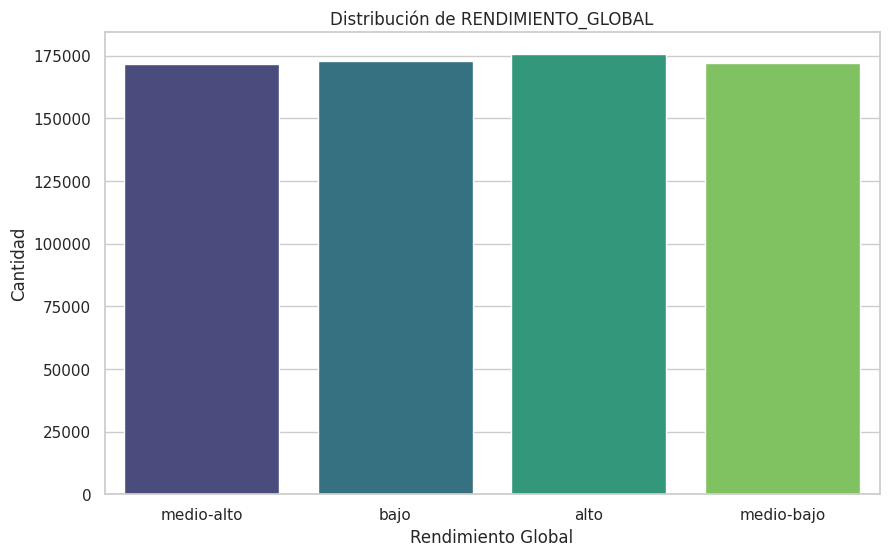

In [9]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# 1. Distribución de la variable 'RENDIMIENTO_GLOBAL'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('Distribución de RENDIMIENTO_GLOBAL')
plt.ylabel('Cantidad')
plt.xlabel('Rendimiento Global')
plt.show()



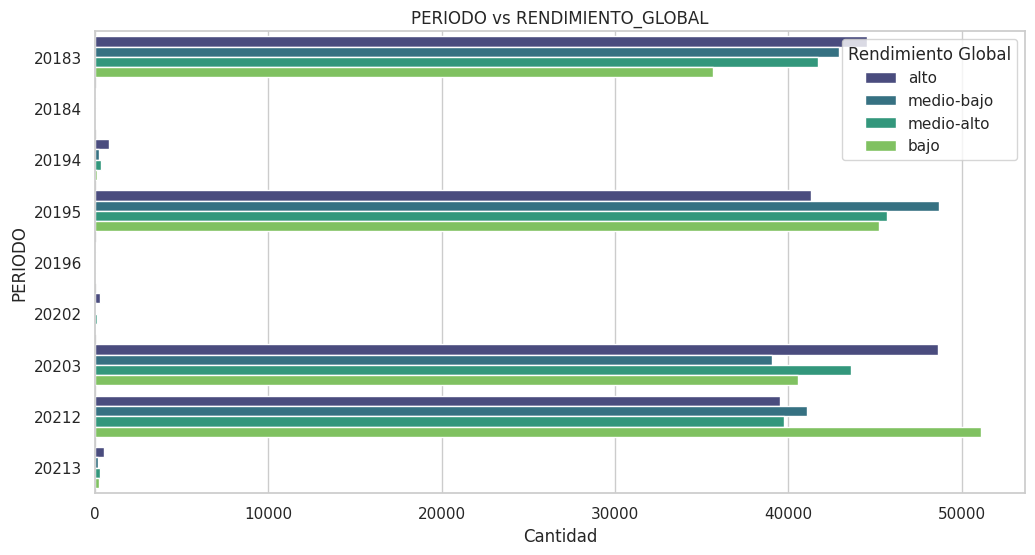

In [10]:
# 2. PERIODO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='PERIODO', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('PERIODO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('PERIODO')
plt.legend(title='Rendimiento Global')
plt.show()

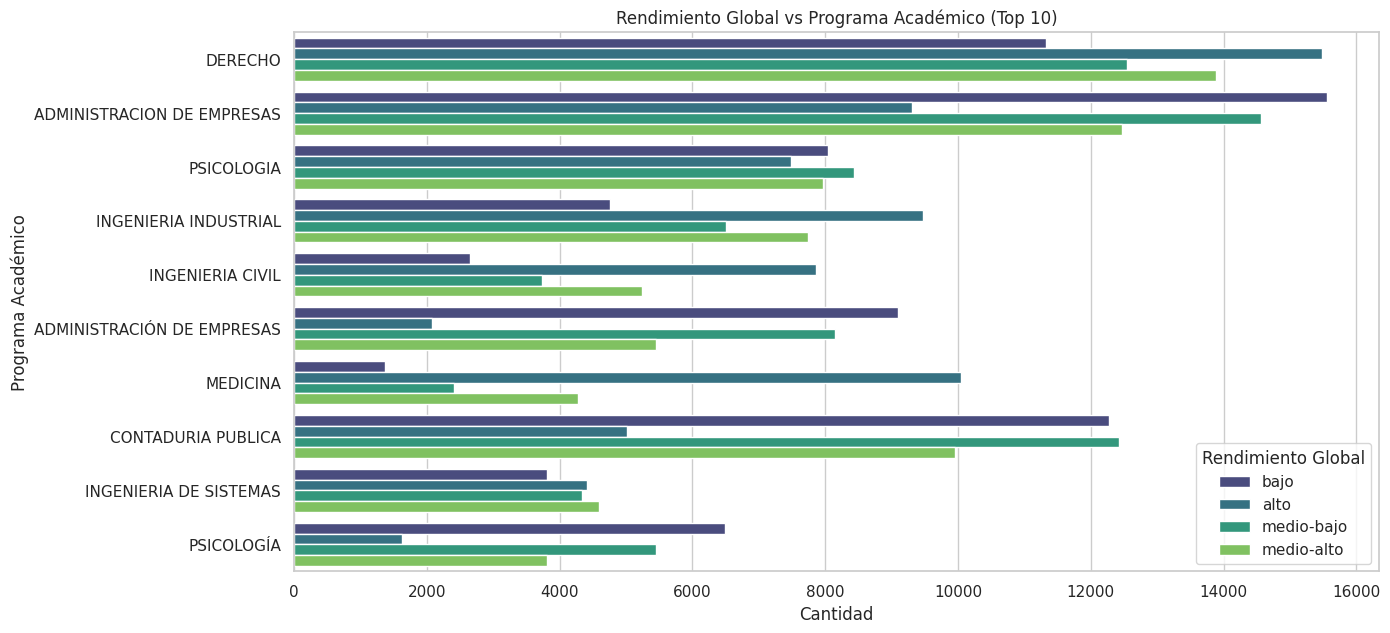

In [12]:
# 3. Relación entre 'RENDIMIENTO_GLOBAL' y 'ESTU_PRGM_ACADEMICO' (los 10 programas más frecuentes)
top_programs = data['ESTU_PRGM_ACADEMICO'].value_counts().index[:10]
filtered_data = data[data['ESTU_PRGM_ACADEMICO'].isin(top_programs)]

plt.figure(figsize=(14, 7))
sns.countplot(data=filtered_data, y='ESTU_PRGM_ACADEMICO', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('Rendimiento Global vs Programa Académico (Top 10)')
plt.ylabel('Programa Académico')
plt.xlabel('Cantidad')
plt.legend(title='Rendimiento Global')
plt.show()

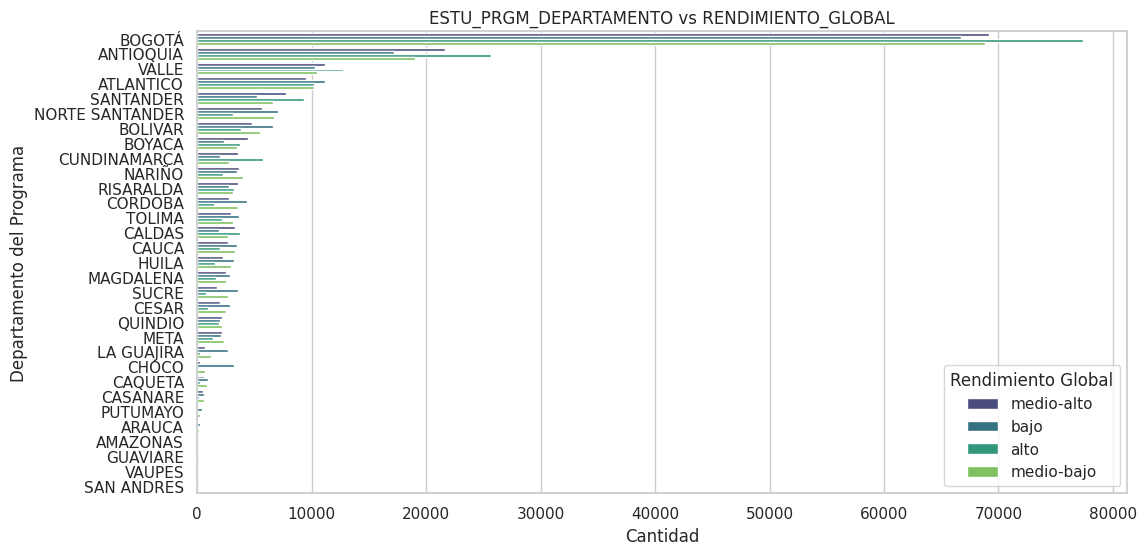

In [19]:
# 4. ESTU_PRGM_DEPARTAMENTO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_PRGM_DEPARTAMENTO', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_PRGM_DEPARTAMENTO'].value_counts().index, palette="viridis")
plt.title('ESTU_PRGM_DEPARTAMENTO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Departamento del Programa')
plt.legend(title='Rendimiento Global')
plt.show()

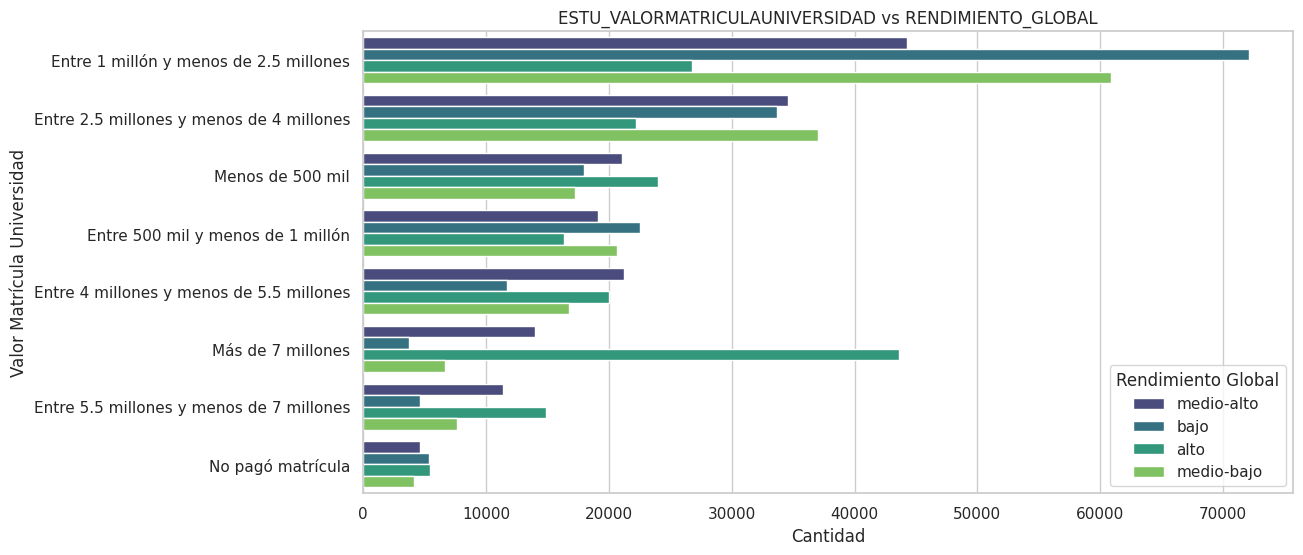

In [20]:
# 5. ESTU_VALORMATRICULAUNIVERSIDAD vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_VALORMATRICULAUNIVERSIDAD', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_VALORMATRICULAUNIVERSIDAD'].value_counts().index, palette="viridis")
plt.title('ESTU_VALORMATRICULAUNIVERSIDAD vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Valor Matrícula Universidad')
plt.legend(title='Rendimiento Global')
plt.show()

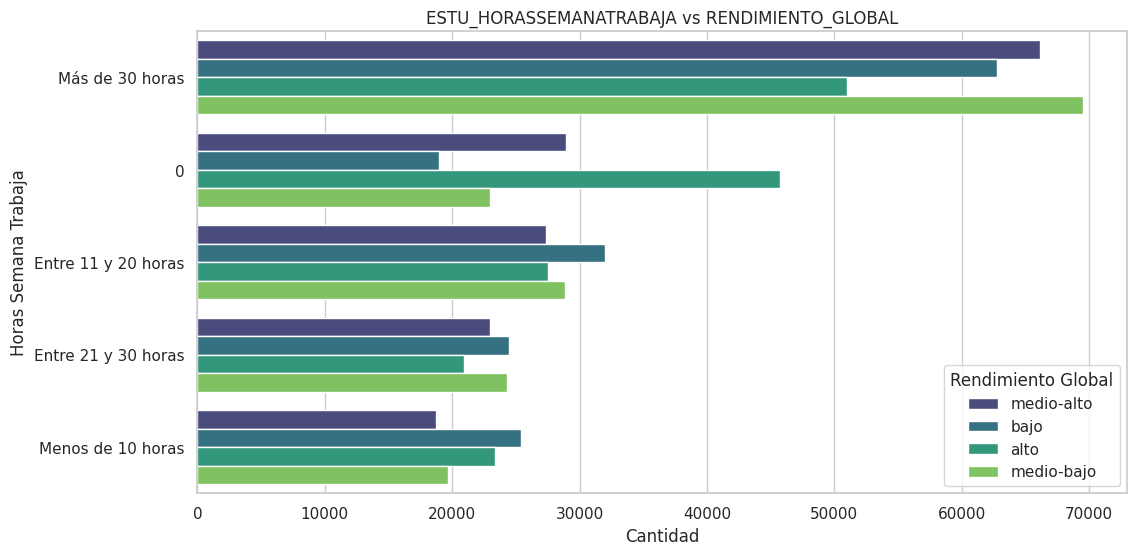

In [21]:
# 6. ESTU_HORASSEMANATRABAJA vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_HORASSEMANATRABAJA', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_HORASSEMANATRABAJA'].value_counts().index, palette="viridis")
plt.title('ESTU_HORASSEMANATRABAJA vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Horas Semana Trabaja')
plt.legend(title='Rendimiento Global')
plt.show()

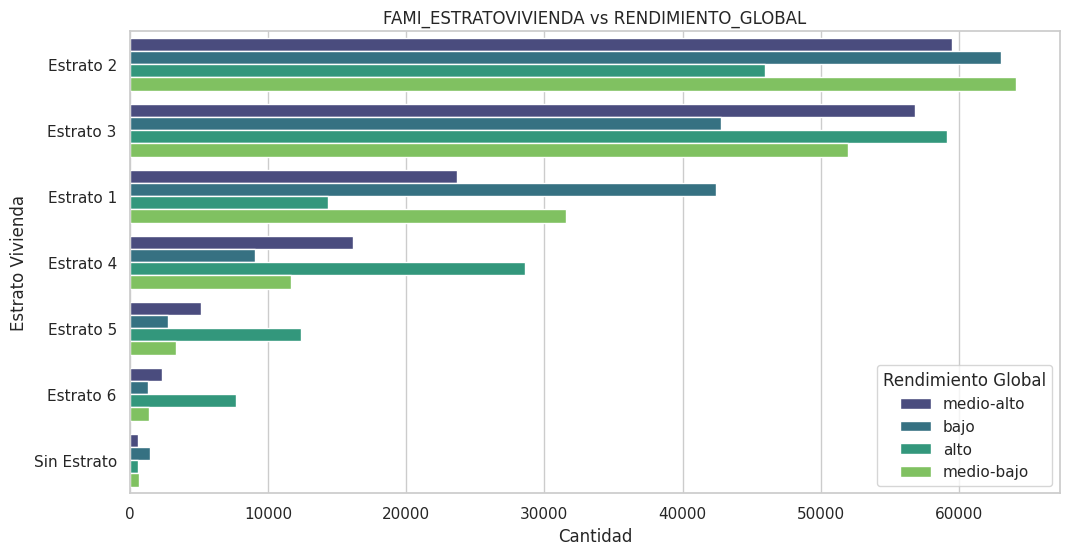

In [22]:
# 7. FAMI_ESTRATOVIVIENDA vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_ESTRATOVIVIENDA', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_ESTRATOVIVIENDA'].value_counts().index, palette="viridis")
plt.title('FAMI_ESTRATOVIVIENDA vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Estrato Vivienda')
plt.legend(title='Rendimiento Global')
plt.show()

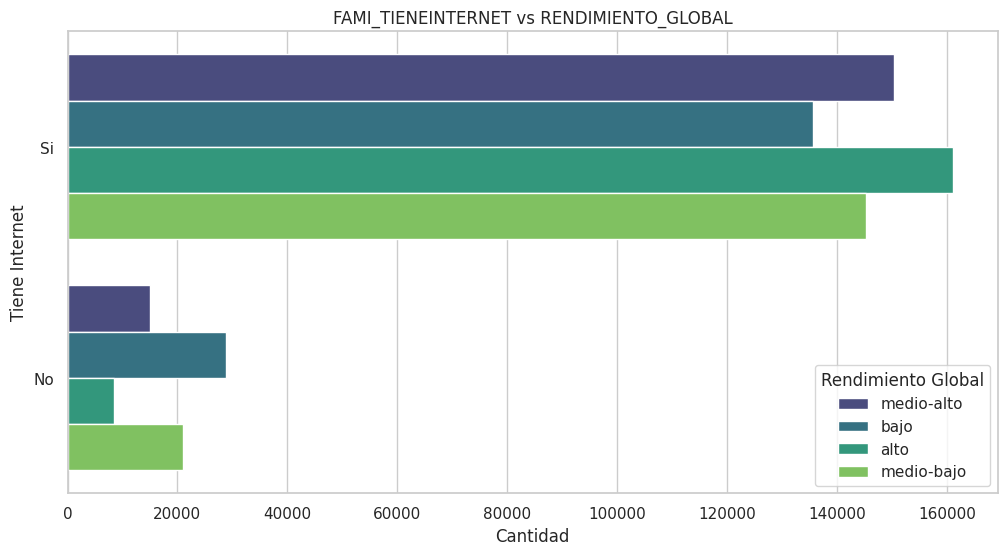

In [23]:
# 8. FAMI_TIENEINTERNET vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_TIENEINTERNET', hue='RENDIMIENTO_GLOBAL', palette="viridis")
plt.title('FAMI_TIENEINTERNET vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Tiene Internet')
plt.legend(title='Rendimiento Global')
plt.show()

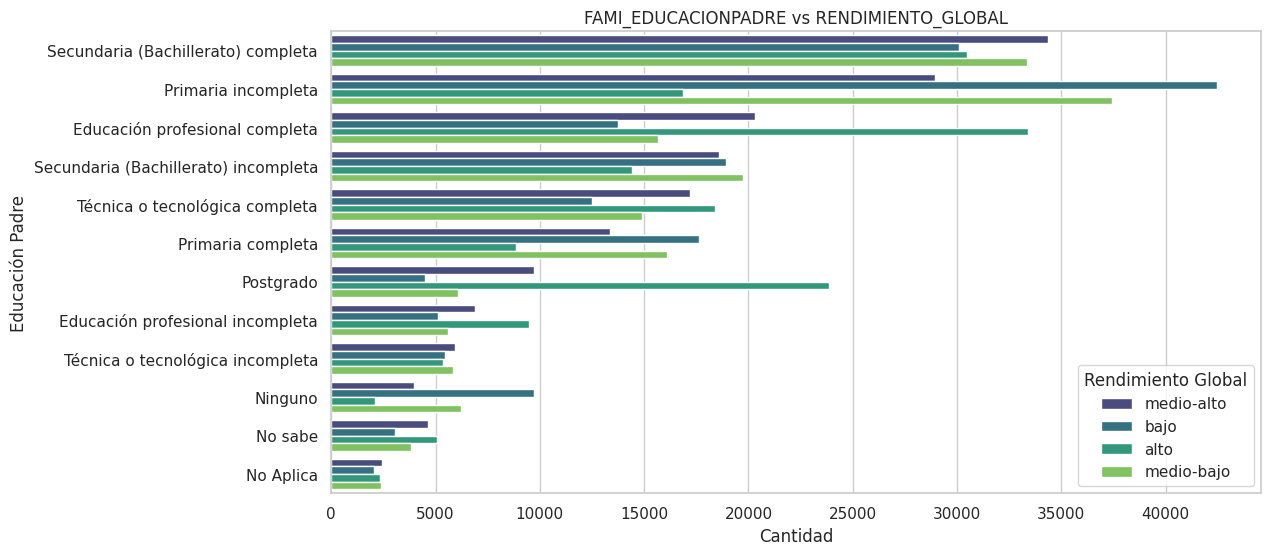

In [24]:
# 9. FAMI_EDUCACIONPADRE vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_EDUCACIONPADRE', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_EDUCACIONPADRE'].value_counts().index, palette="viridis")
plt.title('FAMI_EDUCACIONPADRE vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Educación Padre')
plt.legend(title='Rendimiento Global')
plt.show()

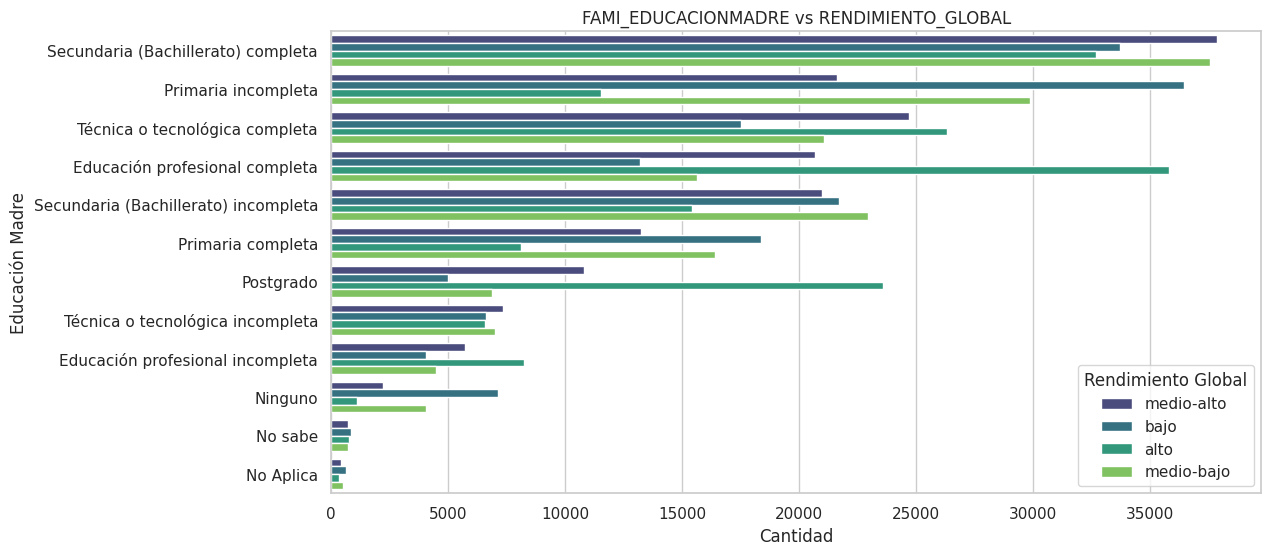

In [25]:
# 10. FAMI_EDUCACIONMADRE vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='FAMI_EDUCACIONMADRE', hue='RENDIMIENTO_GLOBAL',
              order=data['FAMI_EDUCACIONMADRE'].value_counts().index, palette="viridis")
plt.title('FAMI_EDUCACIONMADRE vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Educación Madre')
plt.legend(title='Rendimiento Global')
plt.show()

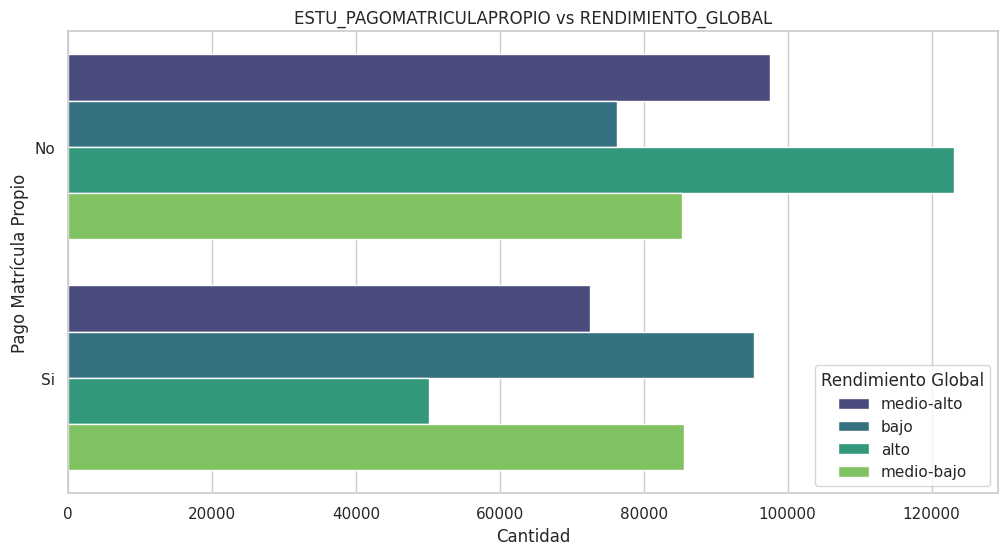

In [26]:
# 11. ESTU_PAGOMATRICULAPROPIO vs RENDIMIENTO_GLOBAL
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='ESTU_PAGOMATRICULAPROPIO', hue='RENDIMIENTO_GLOBAL',
              order=data['ESTU_PAGOMATRICULAPROPIO'].value_counts().index, palette="viridis")
plt.title('ESTU_PAGOMATRICULAPROPIO vs RENDIMIENTO_GLOBAL')
plt.xlabel('Cantidad')
plt.ylabel('Pago Matrícula Propio')
plt.legend(title='Rendimiento Global')
plt.show()